<a href="https://www.kaggle.com/code/kalilurrahman/microsoft-stock-viz-forecast-analysis?scriptVersionId=229457245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-details-updated-regularly/Microsoft_stock_info.csv
/kaggle/input/microsoft-stock-details-updated-regularly/Microsoft_stock_dividends.csv
/kaggle/input/microsoft-stock-details-updated-regularly/Microsoft_stock_history.csv
/kaggle/input/microsoft-stock-details-updated-regularly/Microsoft_stock_spilts.csv
/kaggle/input/microsoft-stock-details-updated-regularly/Microsoft_stock_action.csv


# [🔮🎯📊 Microsoft Stock Price Performance Analysis and Data Visualization 📊🎯🔮](#0)

<a id=1><h3 >1️⃣ Dataset Loading<br></h3></a>
<a id=2><h3 >2️⃣ Dataset Visualization Using Simple Plots<br></h3></a>
<a id=3><h3 >3️⃣ Dataset Visualization Using MPLFinance Plots<br></h3></a>
<a id=4><h3 >4️⃣ Stock Analysis of the data<br></h3></a>
<a id=5><h3 >5️⃣ Let us do a financial ratios calculation using FINTA library <br></h3></a>
<a id=6><h3 >6️⃣ Let us do a financial ratios calculation<br></h3></a>
<a id=7><h3 >7️⃣ Let us do a bit of forecasting using Facebook Prophet Regression <br></h3></a>
<a id=8><h3 >8️⃣ Let us do a Facebook Prophet library<br></h3></a>
</h1>


In [2]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')


try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

     |████████████████████████████████| 75 kB 1.5 MB/s 


/opt/conda/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


# [1️⃣. Dataset Loading](#1)

>

In [3]:
msft = pd.read_csv('../input/microsoft-stock-details-updated-regularly/Microsoft_stock_history.csv')
print(msft.head())

         Date      Open      High       Low     Close      Volume  Dividends  \
0  1986-03-13  0.056001  0.064236  0.056001  0.061491  1031788800        0.0   
1  1986-03-14  0.061491  0.064785  0.061491  0.063687   308160000        0.0   
2  1986-03-17  0.063687  0.065334  0.063687  0.064785   133171200        0.0   
3  1986-03-18  0.064785  0.065334  0.062589  0.063138    67766400        0.0   
4  1986-03-19  0.063138  0.063687  0.061491  0.062040    47894400        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


 # [2️⃣. Dataset Visualization Using Simple Plots](#2)


## Initial simple plots using 
* *Pandas Plotting for opening and closing prices*
* *Plotly OHLC (Open-High-Low-Close) Charts*
* *Statistical Moving Average (SMA) Charts*
* *Exponential Moving Average (EMA) Charts*


#### Simple Pandas plots for the price and volume of Microsoft Stock

<AxesSubplot:>

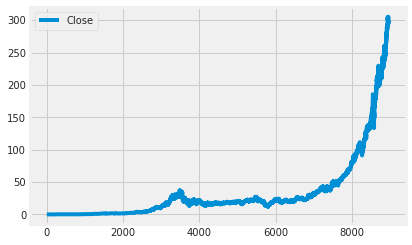

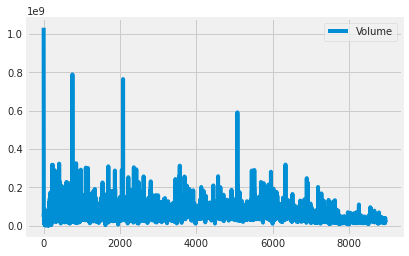

In [4]:
#Closing Price PLot
msft[["Close"]].plot()
#Volume Plot
msft[["Volume"]].plot()

#### OHLC Chart

In [5]:
#OHLC Plot using Plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=msft['Date'],
        open=msft['Open'],
        high=msft['High'],
        low=msft['Low'],
        close=msft['Close']))
fig.show()

#### SMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [6]:
msft['SMA5'] = msft.Close.rolling(5).mean()
msft['SMA20'] = msft.Close.rolling(20).mean()
msft['SMA50'] = msft.Close.rolling(50).mean()
msft['SMA200'] = msft.Close.rolling(200).mean()
msft['SMA500'] = msft.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=msft['Date'],
                              open=msft['Open'],
                              high=msft['High'],
                              low=msft['Low'],
                              close=msft['Close'], name = "OHLC"),
                      go.Scatter(x=msft.Date, y=msft.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=msft.Date, y=msft.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=msft.Date, y=msft.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=msft.Date, y=msft.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=msft.Date, y=msft.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

#### EMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [7]:

msft['EMA5'] = msft.Close.ewm(span=5, adjust=False).mean()
msft['EMA20'] = msft.Close.ewm(span=20, adjust=False).mean()
msft['EMA50'] = msft.Close.ewm(span=50, adjust=False).mean()
msft['EMA200'] = msft.Close.ewm(span=200, adjust=False).mean()
msft['EMA500'] = msft.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=msft['Date'],
                              open=msft['Open'],
                              high=msft['High'],
                              low=msft['Low'],
                              close=msft['Close'], name = "OHLC"),
                      go.Scatter(x=msft.Date, y=msft.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=msft.Date, y=msft.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=msft.Date, y=msft.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=msft.Date, y=msft.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=msft.Date, y=msft.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

#### Reset the index on to the Date column

In [8]:
msft.set_index('Date')

Open        High         Low       Close      Volume  \
Date                                                                     
1986-03-13    0.056001    0.064236    0.056001    0.061491  1031788800   
1986-03-14    0.061491    0.064785    0.061491    0.063687   308160000   
1986-03-17    0.063687    0.065334    0.063687    0.064785   133171200   
1986-03-18    0.064785    0.065334    0.062589    0.063138    67766400   
1986-03-19    0.063138    0.063687    0.061491    0.062040    47894400   
...                ...         ...         ...         ...         ...   
2021-09-16  303.760010  305.309998  300.760010  305.220001    19550800   
2021-09-17  304.170013  304.500000  299.529999  299.869995    41309300   
2021-09-20  296.329987  298.720001  289.519989  294.299988    38278700   
2021-09-21  295.690002  297.540009  294.070007  294.799988    22364100   
2021-09-22  296.730011  300.220001  294.510010  298.579987    26614400   

            Dividends  Stock Splits        SMA5       SMA20       SMA50  \
Date                                                                      
1986-03-13        0.0           0.0         NaN         NaN         NaN   
1986-03-14        0.0           0.0         NaN         NaN         NaN   
1986-03-17        0.0           0.0         NaN         NaN         NaN   
1986-03-18        0.0           0.0         NaN         NaN         NaN   
1986-03-19        0.0           0.0    0.063028         NaN         NaN   
...               ...           ...         ...         ...         ...   
2021-09-16        0.0           0.0  300.506000  300.948997  291.362002   
2021-09-17        0.0           0.0  301.338000  301.103998  291.821603   
2021-09-20        0.0           0.0  300.800000  300.600998  292.159424   
2021-09-21        0.0           0.0  299.801996  300.108498  292.519622   
2021-09-22        0.0           0.0  298.553992  299.906497  292.882359   

                SMA200      SMA500        EMA5       EMA20       EMA50  \
Date                                                                     
1986-03-13         NaN         NaN    0.061491    0.061491    0.061491   
1986-03-14         NaN         NaN    0.062223    0.061700    0.061577   
1986-03-17         NaN         NaN    0.063077    0.061994    0.061703   
1986-03-18         NaN         NaN    0.063097    0.062103    0.061759   
1986-03-19         NaN         NaN    0.062745    0.062097    0.061770   
...                ...         ...         ...         ...         ...   
2021-09-16  252.392824  207.800697  302.141790  299.011329  290.480934   
2021-09-17  252.818149  208.131240  301.384525  299.093107  290.849132   
2021-09-20  253.219796  208.446763  299.023013  298.636619  290.984460   
2021-09-21  253.629557  208.762933  297.615338  298.271226  291.134089   
2021-09-22  254.057622  209.090211  297.936887  298.300632  291.426085   

                EMA200      EMA500  
Date                                
1986-03-13    0.061491    0.061491  
1986-03-14    0.061513    0.061499  
1986-03-17    0.061545    0.061513  
1986-03-18    0.061561    0.061519  
1986-03-19    0.061566    0.061521  
...                ...         ...  
2021-09-16  257.071679  215.175511  
2021-09-17  257.497533  215.513613  
2021-09-20  257.863727  215.828130  
2021-09-21  258.231252  216.143386  
2021-09-22  258.632732  216.472475  

[8956 rows x 17 columns]

#### Create a column on daily change percentages for the Stock

In [9]:
msft['daily_change_pct'] = msft['Close'].pct_change()*100
msft['returns'] = msft['daily_change_pct'] / msft['Close']  
msft.head()

Date      Open      High       Low     Close      Volume  Dividends  \
0  1986-03-13  0.056001  0.064236  0.056001  0.061491  1031788800        0.0   
1  1986-03-14  0.061491  0.064785  0.061491  0.063687   308160000        0.0   
2  1986-03-17  0.063687  0.065334  0.063687  0.064785   133171200        0.0   
3  1986-03-18  0.064785  0.065334  0.062589  0.063138    67766400        0.0   
4  1986-03-19  0.063138  0.063687  0.061491  0.062040    47894400        0.0   

   Stock Splits      SMA5  SMA20  SMA50  SMA200  SMA500      EMA5     EMA20  \
0           0.0       NaN    NaN    NaN     NaN     NaN  0.061491  0.061491   
1           0.0       NaN    NaN    NaN     NaN     NaN  0.062223  0.061700   
2           0.0       NaN    NaN    NaN     NaN     NaN  0.063077  0.061994   
3           0.0       NaN    NaN    NaN     NaN     NaN  0.063097  0.062103   
4           0.0  0.063028    NaN    NaN     NaN     NaN  0.062745  0.062097   

      EMA50    EMA200    EMA500  daily_change_pct    returns  
0  0.061491  0.061491  0.061491               NaN        NaN  
1  0.061577  0.061513  0.061499          3.571181  56.074288  
2  0.061703  0.061545  0.061513          1.725014  26.626665  
3  0.061759  0.061561  0.061519         -2.543160 -40.279630  
4  0.061770  0.061566  0.061521         -1.739010 -28.030626

#### Create a histogram on the daily changes / percentage

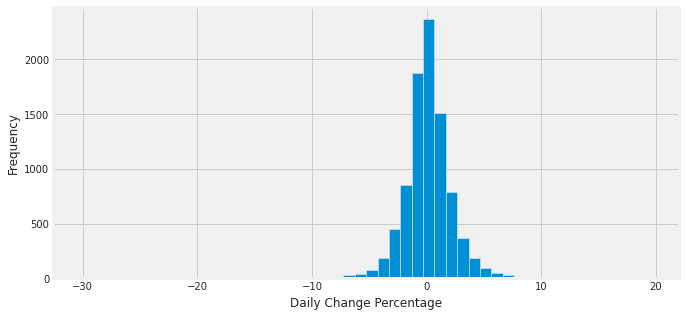

count    8955.000000
mean        0.117707
std         2.135123
min       -30.115894
25%        -0.913592
50%         0.035818
75%         1.128225
max        19.565189
Name: daily_change_pct, dtype: float64

In [10]:
msft['daily_change_pct'].fillna(0)
msft['daily_change_pct'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily Change Percentage')
plt.ylabel('Frequency')
plt.show()
#print the statistics on daily change percentage
msft.daily_change_pct.describe()

#### Plot 7-day rolling averages for volume of stocks traded

<AxesSubplot:>

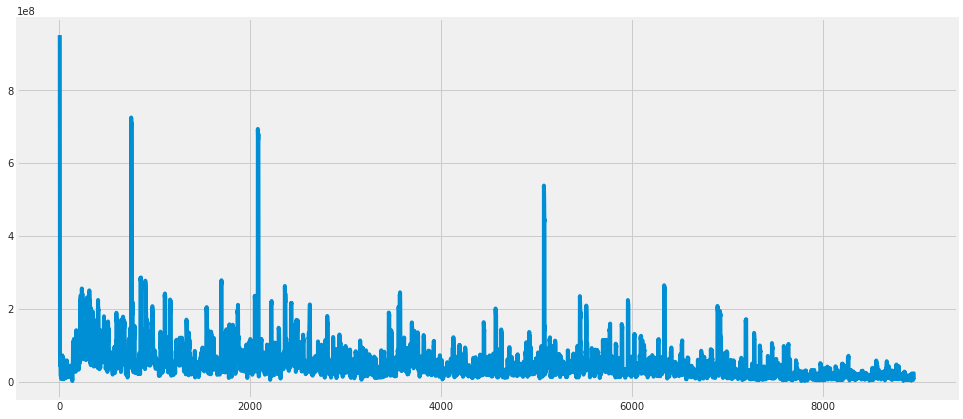

In [11]:
msft_vol = msft['Volume'].rolling(7).std()*np.sqrt(7)
msft_vol.plot(figsize = (15, 7))

#### Define a daily trend function for usage in aggregation

In [12]:
def daily_trend(x):
    if x > -0.5 and x <= 0.5:
        return 'No change'
    elif x > 0.5 and x <= 2:
        return 'Upto 2% Increase'
    elif x > -2 and x <= -0.5:
        return 'Upto 2% Decrease'
    elif x > 2 and x <= 5:
        return '2-5% Increase'
    elif x > -5 and x <= -2:
        return '2-5% Decrease'
    elif x > 5 and x <= 10:
        return '5-10% Increase'
    elif x > -10 and x <= -5:
        return '5-10% Decrease'
    elif x > 10:
        return '>10% Increase'
    elif x <= -10:
        return '>10% Decrease'

#### SMA chart plotting for 5, 20, 50, 200, 500 day moving averages

In [13]:
msft['Trend']= np.zeros(msft['daily_change_pct'].count()+1)
msft['Trend']= msft['daily_change_pct'].apply(lambda x:daily_trend(x))
msft['Trend'].replace('None','No change')
msft.head()

Date      Open      High       Low     Close      Volume  Dividends  \
0  1986-03-13  0.056001  0.064236  0.056001  0.061491  1031788800        0.0   
1  1986-03-14  0.061491  0.064785  0.061491  0.063687   308160000        0.0   
2  1986-03-17  0.063687  0.065334  0.063687  0.064785   133171200        0.0   
3  1986-03-18  0.064785  0.065334  0.062589  0.063138    67766400        0.0   
4  1986-03-19  0.063138  0.063687  0.061491  0.062040    47894400        0.0   

   Stock Splits      SMA5  SMA20  ...  SMA200  SMA500      EMA5     EMA20  \
0           0.0       NaN    NaN  ...     NaN     NaN  0.061491  0.061491   
1           0.0       NaN    NaN  ...     NaN     NaN  0.062223  0.061700   
2           0.0       NaN    NaN  ...     NaN     NaN  0.063077  0.061994   
3           0.0       NaN    NaN  ...     NaN     NaN  0.063097  0.062103   
4           0.0  0.063028    NaN  ...     NaN     NaN  0.062745  0.062097   

      EMA50    EMA200    EMA500  daily_change_pct    returns             Trend  
0  0.061491  0.061491  0.061491               NaN        NaN              None  
1  0.061577  0.061513  0.061499          3.571181  56.074288     2-5% Increase  
2  0.061703  0.061545  0.061513          1.725014  26.626665  Upto 2% Increase  
3  0.061759  0.061561  0.061519         -2.543160 -40.279630     2-5% Decrease  
4  0.061770  0.061566  0.061521         -1.739010 -28.030626  Upto 2% Decrease  

[5 rows x 21 columns]

#### A Pie & Bar Chart of Daily Percentage change categories

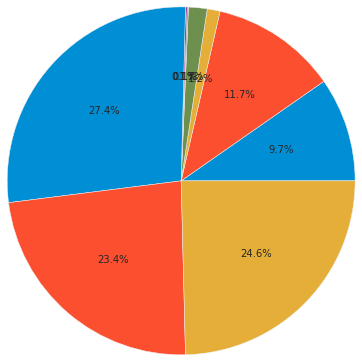

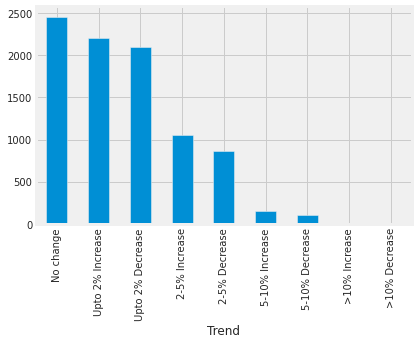

In [14]:

msft_pie_data = msft.groupby('Trend')
#pie_label = msft_pie_data['Trend'].unique()
plt.pie(msft_pie_data['Trend'].count(), #labels = pie_label, 
        autopct = '%1.1f%%', radius = 2 )
plt.show()
ax=msft_pie_data['Trend'].count().sort_values(ascending=False).plot.bar(rot=90)
plt.show()

# [3️⃣. Dataset Visualization Using MPLFinance Plots](#3)>


#### General MPLFinance Plot

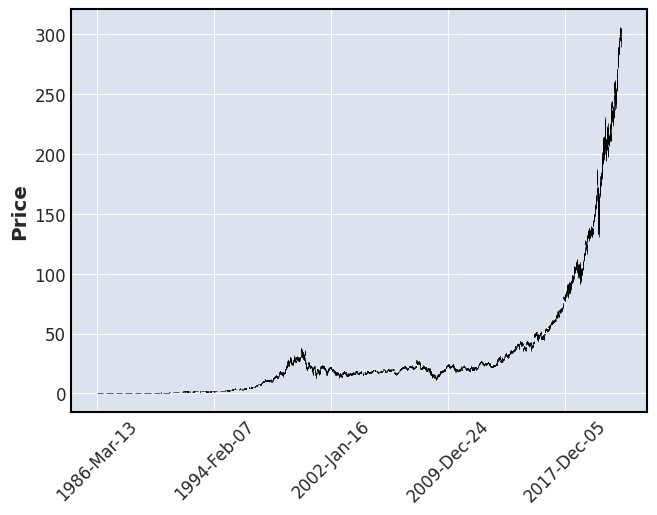

In [15]:
msft.index = pd.DatetimeIndex(msft['Date'])
mpf.plot(msft)

#### CandleStick MPLFinance plot with Moving Averages for (7, 30, 90, 180, 365) days 

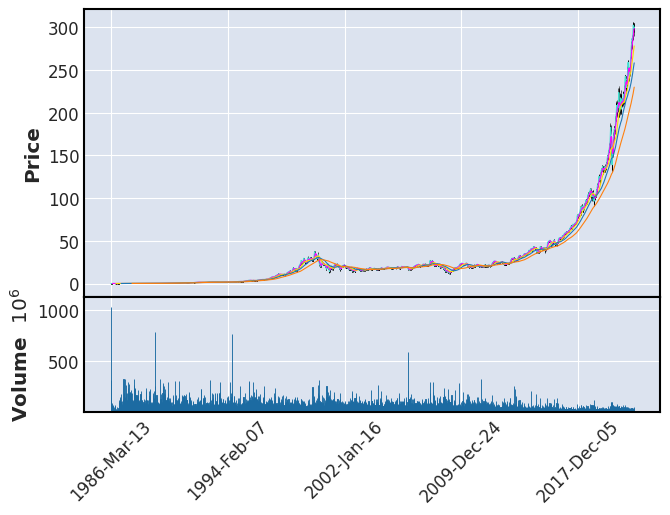

In [16]:
mpf.plot(msft, type='candle', mav = (7, 30, 90, 180, 365), volume = True)

#### Another Candle Stick Plot with Moving Averages and show of non trading days

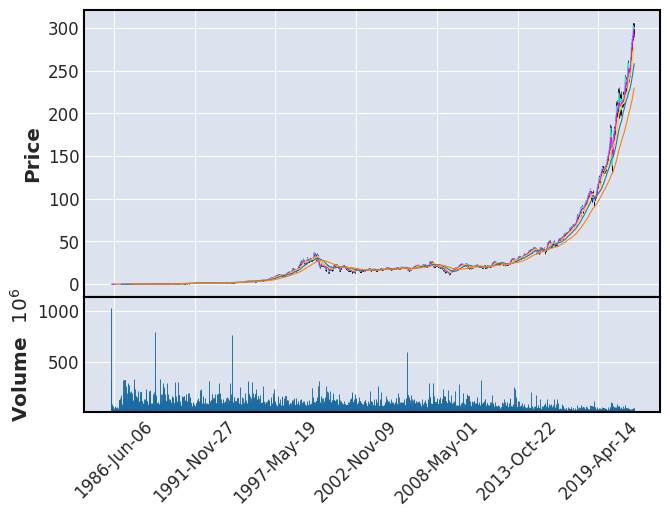

In [17]:
mpf.plot(msft, type='candle', mav = (7, 30, 90, 180, 365), volume = True , show_nontrading = True)

In [18]:
msft.head()

Date      Open      High       Low     Close      Volume  \
Date                                                                         
1986-03-13  1986-03-13  0.056001  0.064236  0.056001  0.061491  1031788800   
1986-03-14  1986-03-14  0.061491  0.064785  0.061491  0.063687   308160000   
1986-03-17  1986-03-17  0.063687  0.065334  0.063687  0.064785   133171200   
1986-03-18  1986-03-18  0.064785  0.065334  0.062589  0.063138    67766400   
1986-03-19  1986-03-19  0.063138  0.063687  0.061491  0.062040    47894400   

            Dividends  Stock Splits      SMA5  SMA20  ...  SMA200  SMA500  \
Date                                                  ...                   
1986-03-13        0.0           0.0       NaN    NaN  ...     NaN     NaN   
1986-03-14        0.0           0.0       NaN    NaN  ...     NaN     NaN   
1986-03-17        0.0           0.0       NaN    NaN  ...     NaN     NaN   
1986-03-18        0.0           0.0       NaN    NaN  ...     NaN     NaN   
1986-03-19        0.0           0.0  0.063028    NaN  ...     NaN     NaN   

                EMA5     EMA20     EMA50    EMA200    EMA500  \
Date                                                           
1986-03-13  0.061491  0.061491  0.061491  0.061491  0.061491   
1986-03-14  0.062223  0.061700  0.061577  0.061513  0.061499   
1986-03-17  0.063077  0.061994  0.061703  0.061545  0.061513   
1986-03-18  0.063097  0.062103  0.061759  0.061561  0.061519   
1986-03-19  0.062745  0.062097  0.061770  0.061566  0.061521   

            daily_change_pct    returns             Trend  
Date                                                       
1986-03-13               NaN        NaN              None  
1986-03-14          3.571181  56.074288     2-5% Increase  
1986-03-17          1.725014  26.626665  Upto 2% Increase  
1986-03-18         -2.543160 -40.279630     2-5% Decrease  
1986-03-19         -1.739010 -28.030626  Upto 2% Decrease  

[5 rows x 21 columns]

# [4️⃣. Stock Analysis of the data](#4)



##### Following is a reuse from the kernel https://www.kaggle.com/datapple/eda-tesla-stock-price-financial-analysis and modified for the analysis

#### Identify the days where the SMA20 is greater than SMA50 and tag the dates.These are target investment dates

In [19]:
msft['Shares'] = [1 if msft.loc[ei, 'SMA20']>msft.loc[ei, 'SMA50'] else 0 for ei in msft.index]

### Tag the dates as profit when the closing price is greater than the preceding date 

#### Plot the dates of wealth generation over the years

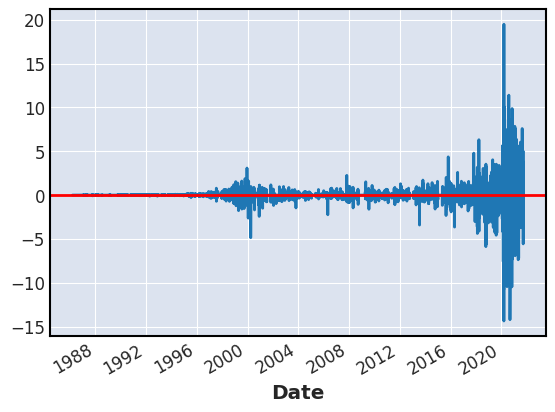

In [20]:
msft['Close1'] = msft['Close'].shift(-1)
msft['Profit'] = [msft.loc[ei, 'Close1'] - msft.loc[ei, 'Close'] if msft.loc[ei, 'Shares']==1 else 0 for ei in msft.index]
msft['Profit'].plot()
plt.axhline(y=0, color='red')

#### Calculate the cumulated wealth on the stock

In [21]:
msft['wealth'] = msft['Profit'].cumsum()
msft.tail()

Date        Open        High         Low       Close  \
Date                                                                     
2021-09-16  2021-09-16  303.760010  305.309998  300.760010  305.220001   
2021-09-17  2021-09-17  304.170013  304.500000  299.529999  299.869995   
2021-09-20  2021-09-20  296.329987  298.720001  289.519989  294.299988   
2021-09-21  2021-09-21  295.690002  297.540009  294.070007  294.799988   
2021-09-22  2021-09-22  296.730011  300.220001  294.510010  298.579987   

              Volume  Dividends  Stock Splits        SMA5       SMA20  ...  \
Date                                                                   ...   
2021-09-16  19550800        0.0           0.0  300.506000  300.948997  ...   
2021-09-17  41309300        0.0           0.0  301.338000  301.103998  ...   
2021-09-20  38278700        0.0           0.0  300.800000  300.600998  ...   
2021-09-21  22364100        0.0           0.0  299.801996  300.108498  ...   
2021-09-22  26614400        0.0           0.0  298.553992  299.906497  ...   

                 EMA50      EMA200      EMA500  daily_change_pct   returns  \
Date                                                                         
2021-09-16  290.480934  257.071679  215.175511          0.131223  0.000430   
2021-09-17  290.849132  257.497533  215.513613         -1.752836 -0.005845   
2021-09-20  290.984460  257.863727  215.828130         -1.857474 -0.006311   
2021-09-21  291.134089  258.231252  216.143386          0.169895  0.000576   
2021-09-22  291.426085  258.632732  216.472475          1.282225  0.004294   

                       Trend  Shares      Close1    Profit      wealth  
Date                                                                    
2021-09-16         No change       1  299.869995 -5.350006  187.246329  
2021-09-17  Upto 2% Decrease       1  294.299988 -5.570007  181.676322  
2021-09-20  Upto 2% Decrease       1  294.799988  0.500000  182.176322  
2021-09-21         No change       1  298.579987  3.779999  185.956321  
2021-09-22  Upto 2% Increase       1         NaN       NaN         NaN  

[5 rows x 25 columns]

Text(0.5, 1.0, 'Total money made by Microsoft Stock (number of times ): 186.0')

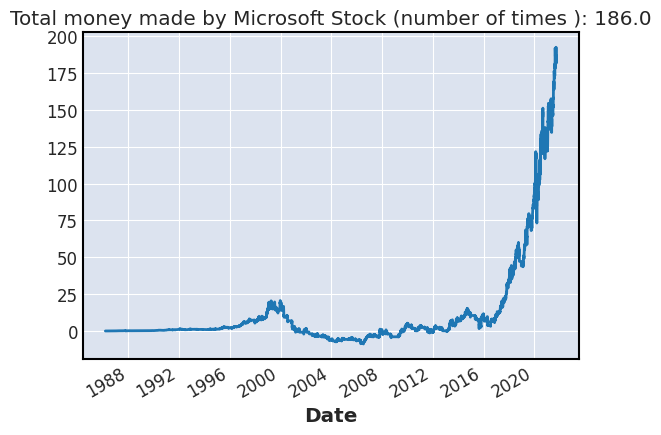

In [22]:
msft['wealth'].plot()
plt.title('Total money made by Microsoft Stock (number of times ): {}'.format(round((msft.loc[msft.index[-2], 'wealth']),1)))

#### Calculate the probability of better investment

In [23]:
msft['LogReturn'] = np.log(msft['Close']).shift(-1) - np.log(msft['Close'])
print(msft['LogReturn'])

Date
1986-03-13    0.035089
1986-03-14    0.017103
1986-03-17   -0.025761
1986-03-18   -0.017543
1986-03-19   -0.026906
                ...   
2021-09-16   -0.017684
2021-09-17   -0.018749
2021-09-20    0.001698
2021-09-21    0.012741
2021-09-22         NaN
Name: LogReturn, Length: 8956, dtype: float64


#### Build a probability distribution function plot using scipy stats package

#### Plot a histogram on logarithm of returns

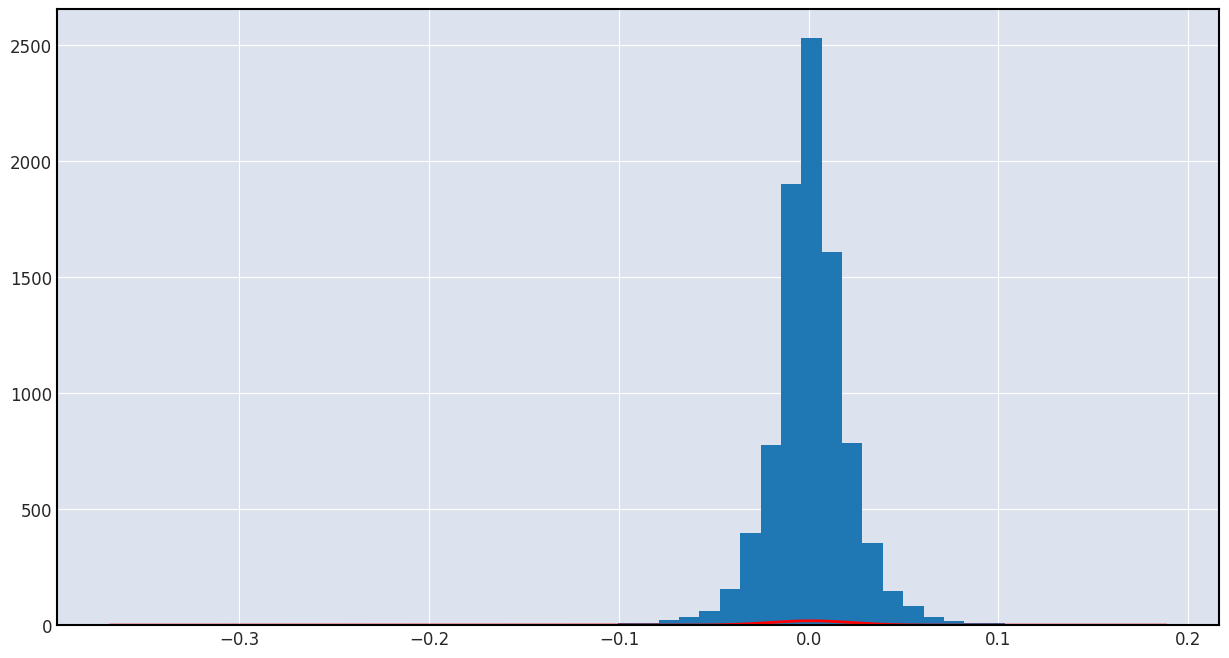

In [24]:
from scipy.stats import norm
mu = msft['LogReturn'].mean()
sigma = msft['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(msft['LogReturn'].min()-0.01, msft['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

msft['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

#### Check for the probability od drops and jumps for a range

In [25]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
for i in range(-5, 6, 1):
    drop = norm.cdf((-i)*0.05, mu220, sigma220)
    jump = norm.cdf(i*0.05, mu220, sigma220)
    print('The probability of %d percent drop is = %f & The probability of %d percent jump is = %f' % (i*5, round(drop,2), -i*5, round(jump,2)))

The probability of -25 percent drop is = 0.410000 & The probability of 25 percent jump is = 0.070000
The probability of -20 percent drop is = 0.360000 & The probability of 20 percent jump is = 0.090000
The probability of -15 percent drop is = 0.320000 & The probability of 15 percent jump is = 0.110000
The probability of -10 percent drop is = 0.270000 & The probability of 10 percent jump is = 0.140000
The probability of -5 percent drop is = 0.230000 & The probability of 5 percent jump is = 0.170000
The probability of 0 percent drop is = 0.200000 & The probability of 0 percent jump is = 0.200000
The probability of 5 percent drop is = 0.170000 & The probability of -5 percent jump is = 0.230000
The probability of 10 percent drop is = 0.140000 & The probability of -10 percent jump is = 0.270000
The probability of 15 percent drop is = 0.110000 & The probability of -15 percent jump is = 0.320000
The probability of 20 percent drop is = 0.090000 & The probability of -20 percent jump is = 0.3600

#### What is the Value At Risk for the Stock?

In [26]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR)

Single day value at risk is:  -0.0342848645329819


#### What is the Mu and Sigma for the stock at 5 and 95 percentile?

In [27]:
# Quantile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.0342848645329819
95% quantile  0.036180544654640774


#### What is the confidence level at various levels?

In [28]:
msft['logReturn'] = np.log(msft['Close'].shift(-1)) - np.log(msft['Close'])
sample_size = msft['logReturn'].shape[0]
sample_mean = msft['logReturn'].mean()
sample_std = msft['logReturn'].std(ddof=1) / sample_size**0.5
# left and right quantile
for i in range(1,10):
    z_left = norm.ppf(0.05*i)
    z_right = norm.ppf((1-0.05*i))
    interval_left = sample_mean+z_left*sample_std
    interval_right = sample_mean+z_right*sample_std
    print('%d percent confidence interval is ' % (100-i*2*5), ( round(interval_left,6), round(interval_right,6)))

90 percent confidence interval is  (0.000576, 0.00132)
80 percent confidence interval is  (0.000658, 0.001238)
70 percent confidence interval is  (0.000713, 0.001182)
60 percent confidence interval is  (0.000757, 0.001138)
50 percent confidence interval is  (0.000795, 0.001101)
40 percent confidence interval is  (0.000829, 0.001067)
30 percent confidence interval is  (0.000861, 0.001035)
20 percent confidence interval is  (0.00089, 0.001005)
10 percent confidence interval is  (0.000919, 0.000976)


# [5️⃣ Let us do a financial ratios calculation using FINTA library](#5)a>


* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'


In [29]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    !pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover


     |████████████████████████████████| 178 kB 6.1 MB/s 


Loading BokehJS ...

In [30]:
fin_msft = pd.read_csv('../input/microsoft-stock-details-updated-regularly/Microsoft_stock_history.csv', index_col="Date", parse_dates=True)
print(fin_msft.head())
ohlc=fin_msft
print(TA.SMA(ohlc, 42))
#will return Pandas Series object with "Awesome oscillator" values
TA.AO(ohlc)
#expects ["volume"] column as input
print(TA.OBV(ohlc))
#will return Series with Bollinger Bands columns [BB_UPPER, BB_LOWER]
print(TA.BBANDS(ohlc))
#will return Series with calculated BBANDS values but will use KAMA instead of MA for calculation, other types of Moving Averages are allowed as well.
print(TA.BBANDS(ohlc, MA=TA.KAMA(ohlc, 20)))

                Open      High       Low     Close      Volume  Dividends  \
Date                                                                        
1986-03-13  0.056001  0.064236  0.056001  0.061491  1031788800        0.0   
1986-03-14  0.061491  0.064785  0.061491  0.063687   308160000        0.0   
1986-03-17  0.063687  0.065334  0.063687  0.064785   133171200        0.0   
1986-03-18  0.064785  0.065334  0.062589  0.063138    67766400        0.0   
1986-03-19  0.063138  0.063687  0.061491  0.062040    47894400        0.0   

            Stock Splits  
Date                      
1986-03-13           0.0  
1986-03-14           0.0  
1986-03-17           0.0  
1986-03-18           0.0  
1986-03-19           0.0  
Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17           NaN
1986-03-18           NaN
1986-03-19           NaN
                 ...    
2021-09-16    293.747869
2021-09-17    294.249862
2021-09-20    294.569807
2021-09-21    294.789015
2021-09-22    29

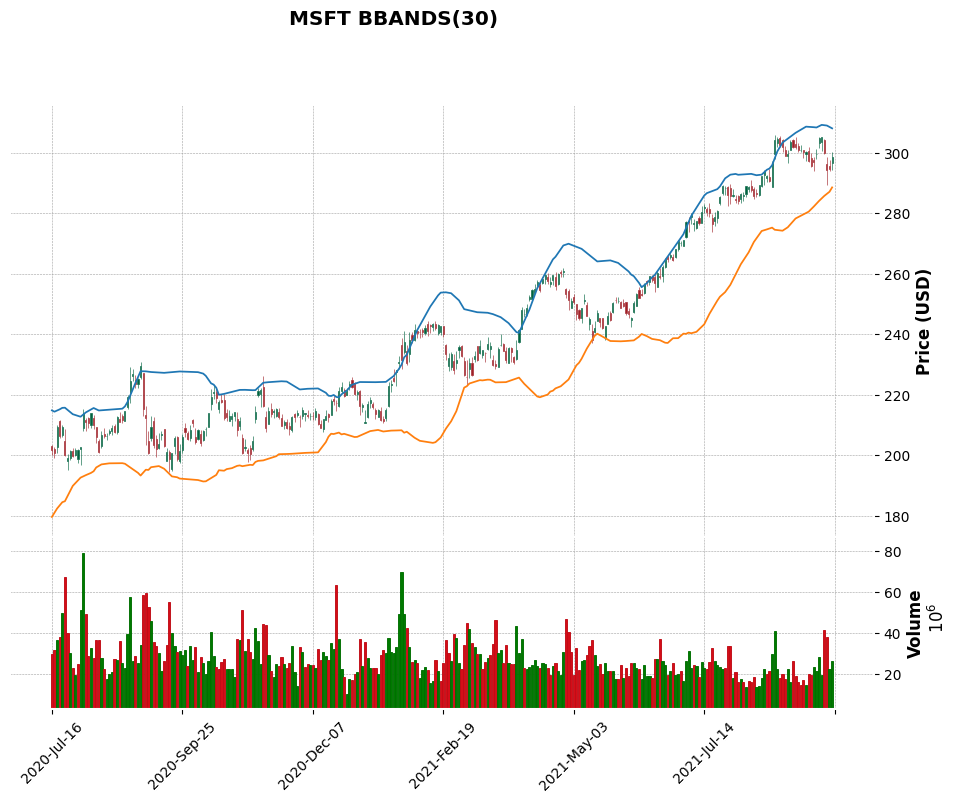

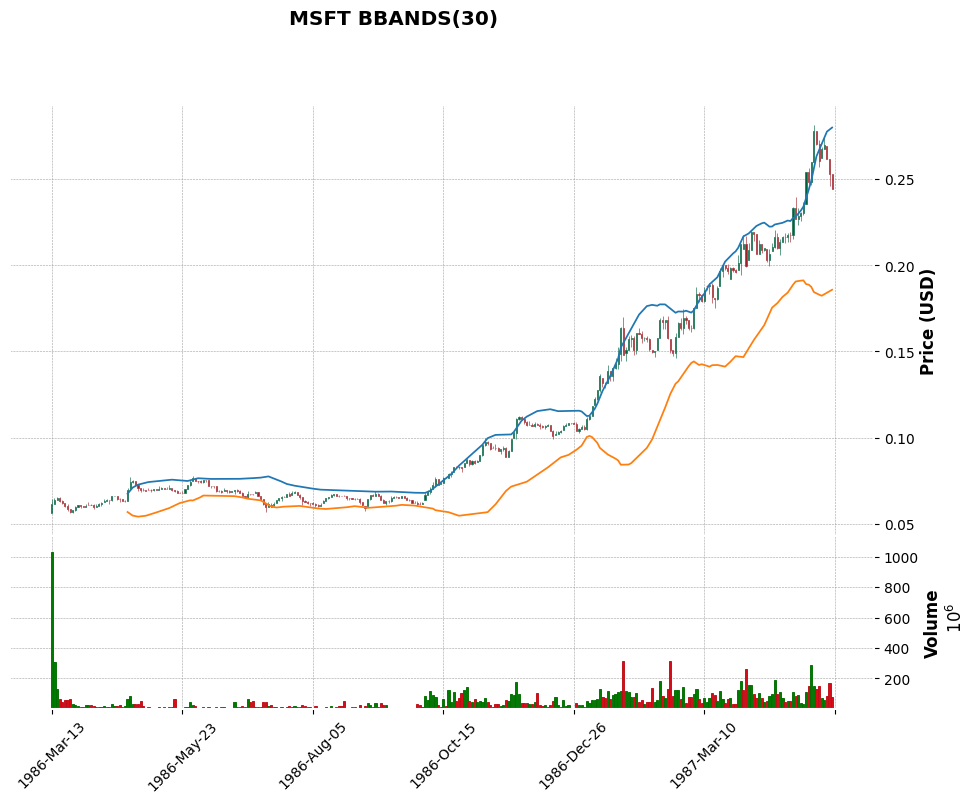

In [31]:

# calc bol band
bbands = TA.BBANDS(fin_msft, 30)

# cherry pick what to show on the chart
bands_plot = pd.concat([bbands.BB_UPPER, bbands.BB_LOWER], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))

mpf.plot(fin_msft.tail(300), type='candle', style='charles',
        title='MSFT BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

apd = mpf.make_addplot(bands_plot.head(300))

mpf.plot(fin_msft.head(300), type='candle', style='charles',
        title='MSFT BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

Plotting .... TA.SMA(ohlc).plot(title=' Simple Moving Average ')
Plotting .... TA.SMM(ohlc).plot(title=' Simple Moving Median ')
Plotting .... TA.SSMA(ohlc).plot(title=' Smoothed Simple Moving Average ')
Plotting .... TA.EMA(ohlc).plot(title=' Exponential Moving Average ')
Plotting .... TA.DEMA(ohlc).plot(title=' Double Exponential Moving Average ')
Plotting .... TA.TEMA(ohlc).plot(title=' Triple Exponential Moving Average ')
Plotting .... TA.TRIMA(ohlc).plot(title=' Triangular Moving Average ')
Plotting .... TA.TRIX(ohlc).plot(title=' Triple Exponential Moving Average Oscillator ')
Plotting .... TA.VAMA(ohlc).plot(title=' Volume Adjusted Moving Average ')
Plotting .... TA.ER(ohlc).plot(title=' Kaufman Efficiency Indicator ')
Plotting .... TA.KAMA(ohlc).plot(title=' Kaufmans Adaptive Moving Average ')
Plotting .... TA.ZLEMA(ohlc).plot(title=' Zero Lag Exponential Moving Average ')
Plotting .... TA.WMA(ohlc).plot(title=' Weighted Moving Average ')
Plotting .... TA.HMA(ohlc).plot(title='

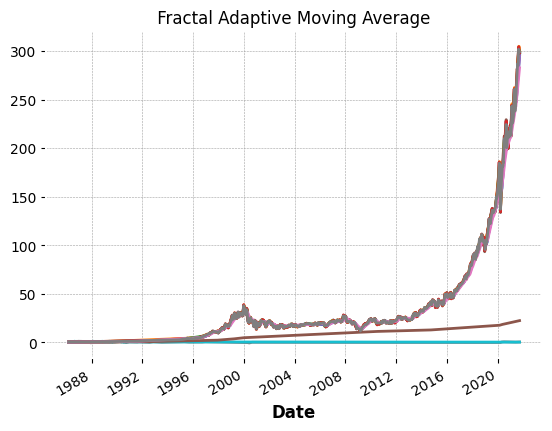

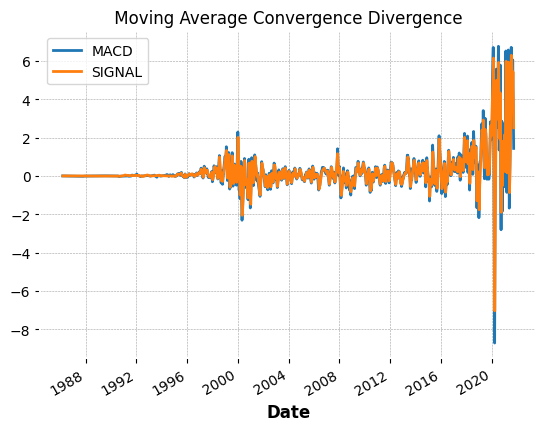

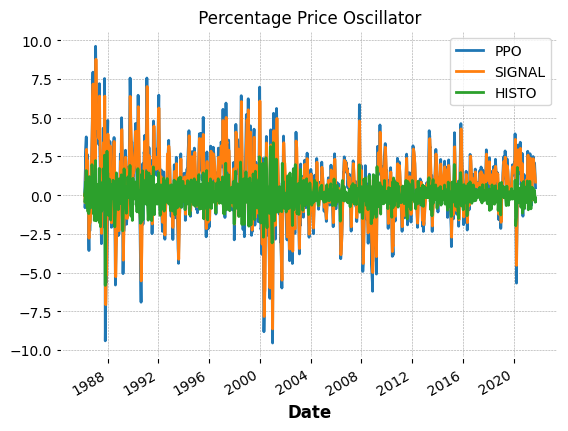

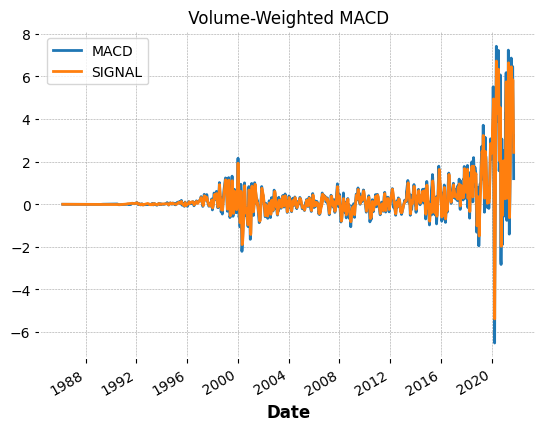

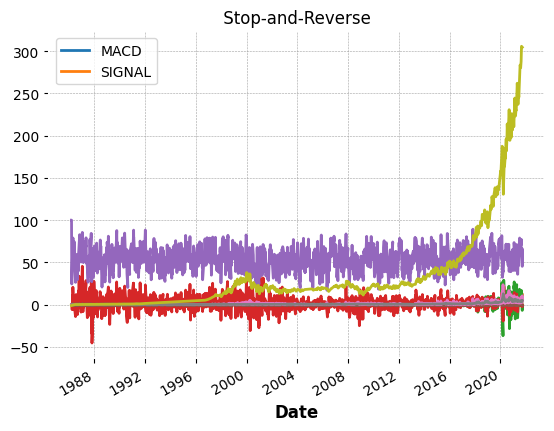

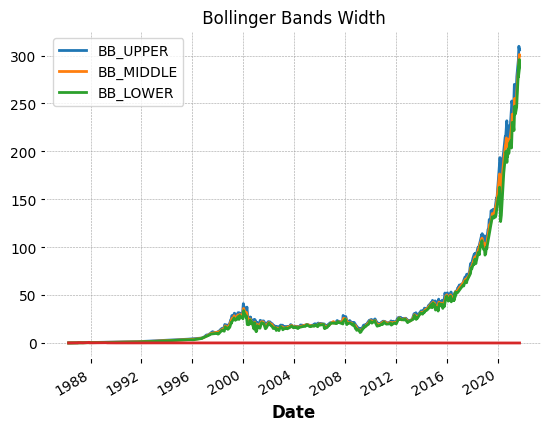

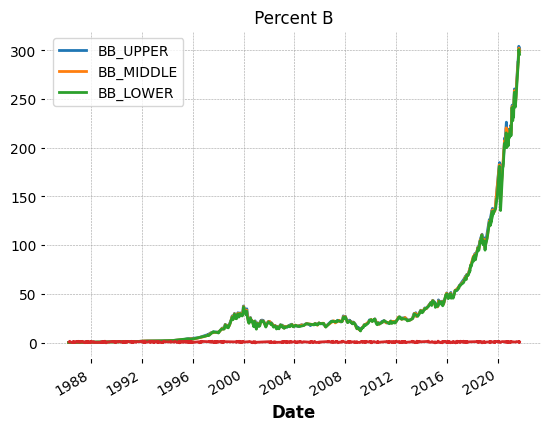

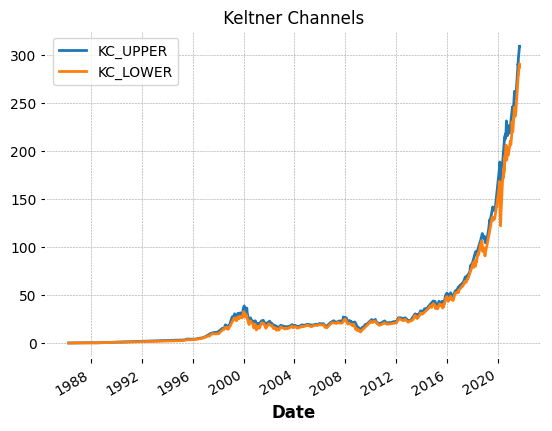

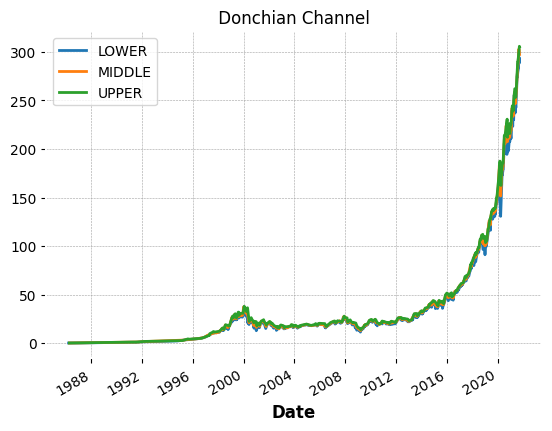

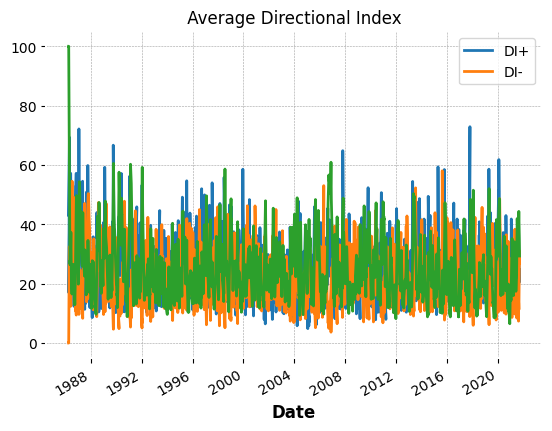

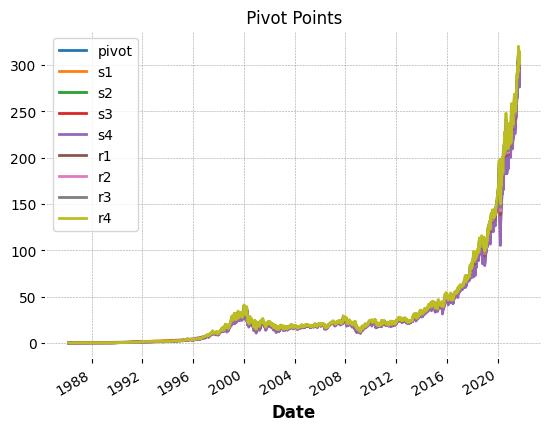

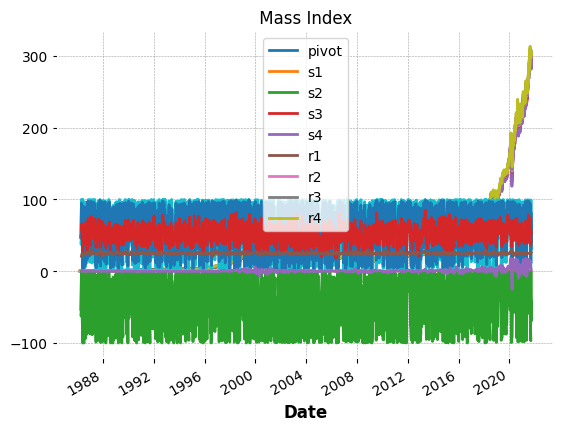

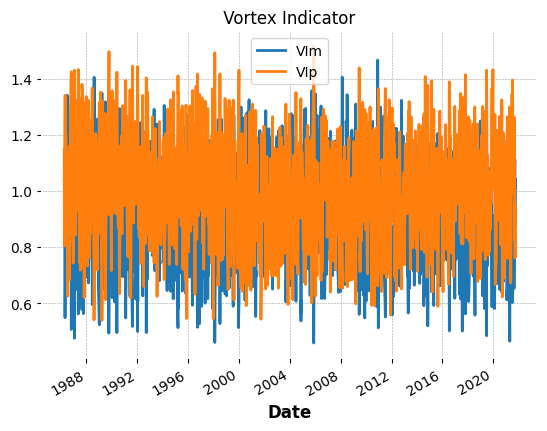

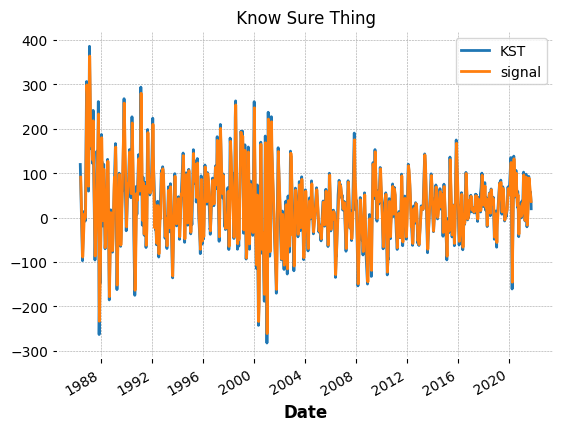

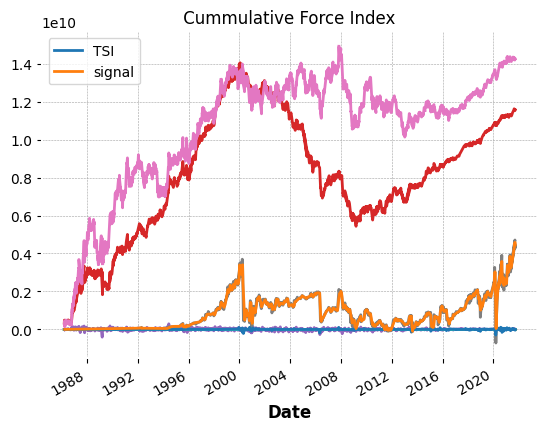

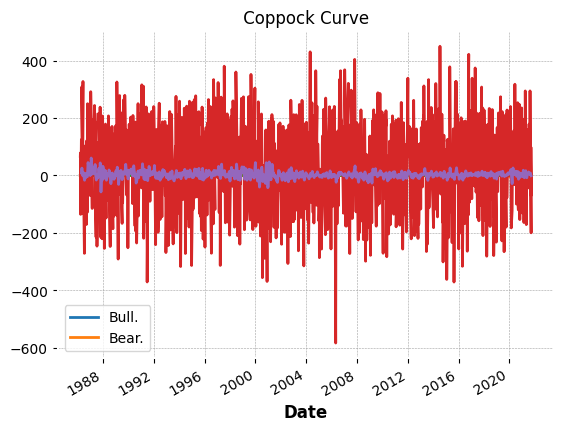

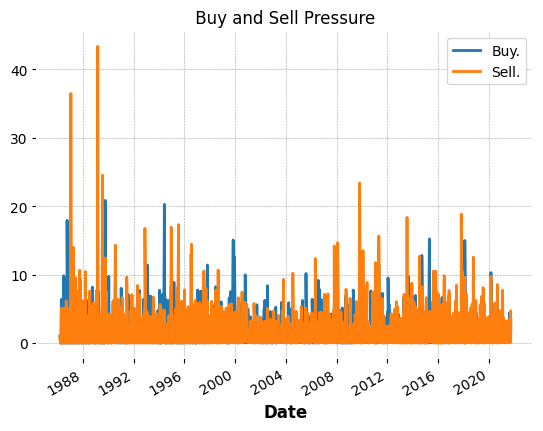

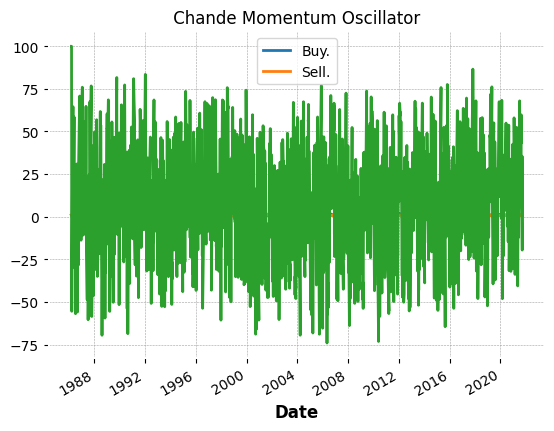

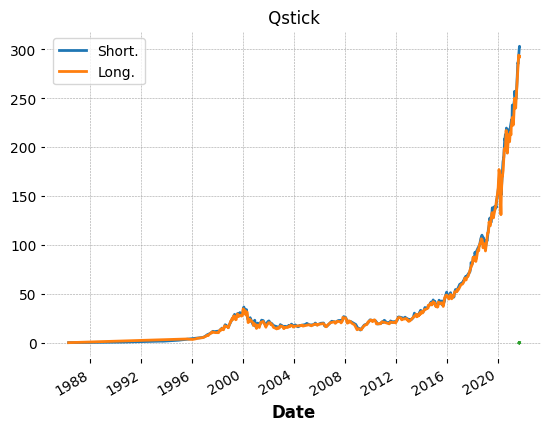

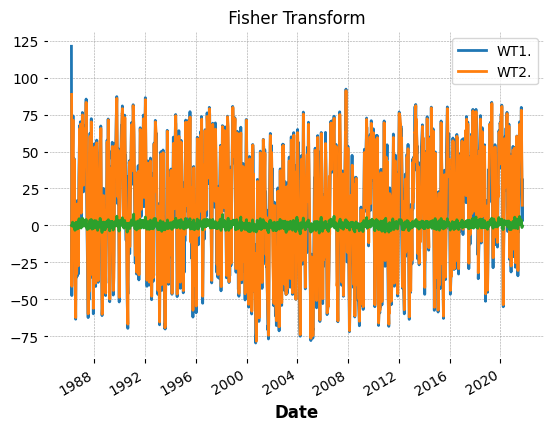

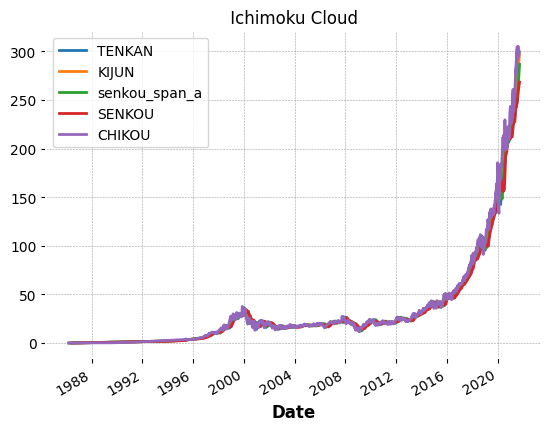

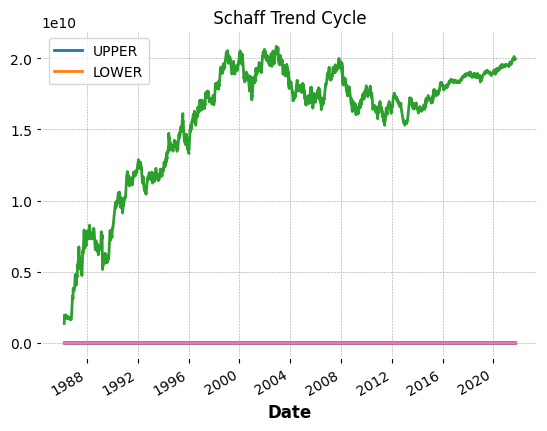

In [32]:

function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 ' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "')"
    print('Plotting ....' , function_name)
    result = eval(function_name)


## Plot the EMA Averages

<AxesSubplot:xlabel='Date'>

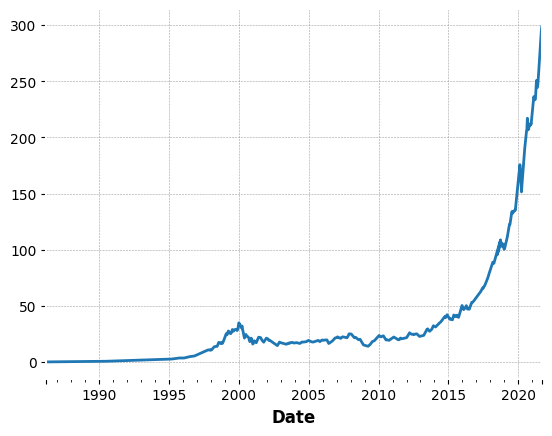

In [33]:
from finta.utils import resample_calendar
fin_ohlc = ohlc[['Close', 'Volume', 'Open', 'High', 'Low']]
fin_ohlc.columns = ['close', 'volume', 'open', 'high', 'low']
fin_ohlc["close"] = ohlc["Close"]#.apply(split)
fin_ohlc["low"] = ohlc["Low"]#.apply(split)
fin_ohlc["high"] = ohlc["High"]#.apply(split)
fin_ohlc["open"] = ohlc["Open"]#.apply(split)
fin_ohlc["volume"] = ohlc["Volume"]

weekly_ohlc = resample_calendar(fin_ohlc, "7d")
TA.EMA(weekly_ohlc, 5).plot()

## Use backtesting library to do a simple data backtesting

In [34]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

In [35]:
bt = Backtest(ohlc, DemaCross,
              cash=10000, commission=0.025)

### Let us check the Backtesting summary

In [36]:
bt.run()

Start                     1986-03-13 00:00:00
End                       2021-09-22 00:00:00
Duration                  12977 days 00:00:00
Exposure Time [%]                    2.288968
Equity Final [$]                          0.0
Equity Peak [$]                  10724.578604
Return [%]                             -100.0
Buy & Hold Return [%]           485469.608213
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]              413.017848
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                  -50.390242
Max. Drawdown Duration    12966 days 00:00:00
Avg. Drawdown Duration     6484 days 00:00:00
# Trades                                    3
Win Rate [%]                        33.333333
Best Trade [%]                       1.894973
Worst Trade [%]                   -100.630172
Avg. Trade [%]                    

## It is very evidend that albeit some volatility, it is a pretty solid long term stock with outstanding run over last 5 years.

> 

# [6️⃣ Let us do a financial ratios calculation](#6)


### Let us try Sharpe Ratio

In [37]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.018 #1.8% risk free rate
msft.columns
temp_df=msft[['Close']]
sharpes = temp_df.apply(sharpe_ratio, args=(N,rf,))#,axis=0)
print("The Sharpe Ratio for the stock i =" , round(sharpes[0],2))

The Sharpe Ratio for the stock i = 10.21


In [38]:
def calculate_sortino(series,N, rf):
    expected_return = np.mean(series)
    below_avg = [i for i in series if i < expected_return]
    risk_free = rf
    sortino = (expected_return - risk_free) / np.std(below_avg)
    return round(sortino, 2)

sortinos = temp_df.apply(calculate_sortino, args=(N,rf,))
print("The Sortino Ratio for the stock is =" , round(sortinos[0],2))

The Sortino Ratio for the stock is = 3.31


In [39]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


max_drawdowns = temp_df.apply(max_drawdown,axis=0)
print("The max_drawdowns Ratio for the stock is =" , round(max_drawdowns[0],2))

The max_drawdowns Ratio for the stock is = 0.0


## Try Bollinger Bands Price

In [40]:
def bollinger_bands_price(price):
    up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bollinger_bands_price = (price['Close'] - low) / (up - low)
    return bollinger_bands_price

# [7️⃣ Let us do a bit of forecasting using Regression ](#7)

 Some inspiration from the following post as well
*  [MLQ.AI](https://www.mlq.ai/price-prediction-with-linear-regression/)


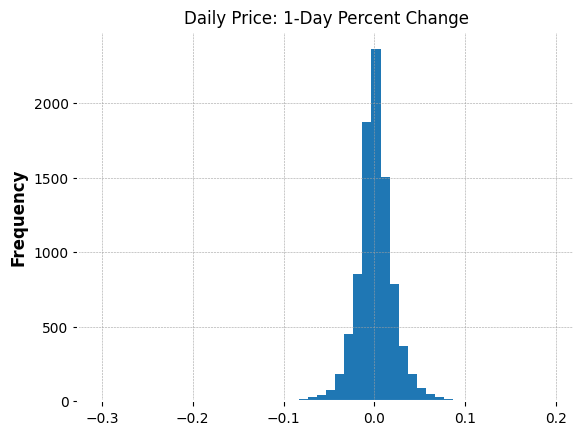

In [41]:
# Histogram of the daily price change percent of 'Close' price
msft['Close'].pct_change().plot.hist(bins=50)
plt.title('Daily Price: 1-Day Percent Change')
plt.show() 

In [42]:
# Create 5-day % changes of Last for the current day, and 5 days in the future
msft['5d_future_close'] = msft['Close'].shift(-5)
msft['5d_close_future_pct'] = msft['5d_future_close'].pct_change(5)
msft['5d_close_pct'] = msft['Close'].pct_change(5)

In [43]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = msft[['5d_close_pct', '5d_close_future_pct']].corr()

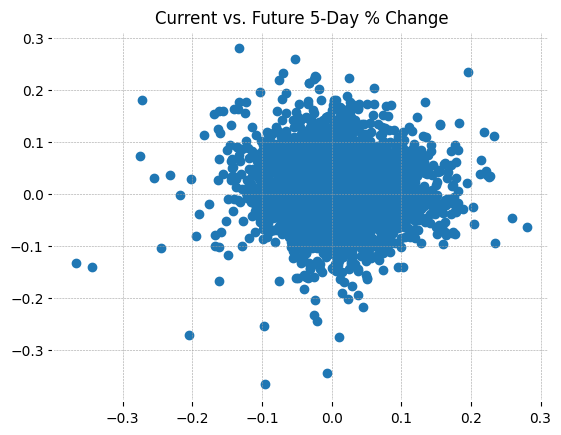

In [44]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(msft['5d_close_pct'], msft['5d_close_future_pct'])
plt.title('Current vs. Future 5-Day % Change')
plt.show()

In [45]:
# a list of the feature names for later
feature_names = ['5d_close_pct']  

In [46]:
# Drop all na values
msft = msft.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = msft[feature_names]
targets = msft['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = msft[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct
5d_close_future_pct             1.000000     -0.059406
5d_close_pct                   -0.059406      1.000000


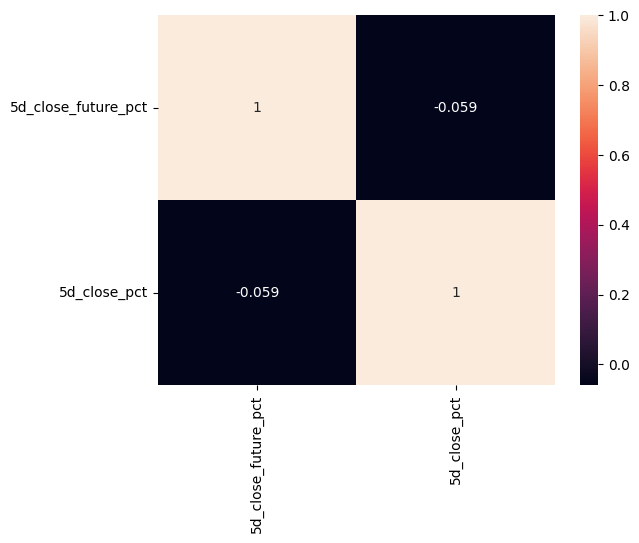

In [47]:
import seaborn as sns
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90) # fix ticklabel directions
plt.show() # show the plot

In [48]:
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 80% of the total number of rows
#.shape gives us the number of rows in our data, and convert to an int
train_size = int(0.8 * features.shape[0])

# split features and targets using python indexing
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(8452, 2) (6761, 2) (1691, 2)


In [49]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     17.83
Date:                 Mon, 24 Mar 2025   Prob (F-statistic):           2.44e-05
Time:                         18:03:59   Log-Likelihood:                 11418.
No. Observations:                 6761   AIC:                        -2.283e+04
Df Residuals:                     6759   BIC:                        -2.282e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0050      0.001    

# [8️⃣ Let us do a Forecasting using FB Prophet ](#8)


# Use of Facebook Prophet for Stock Forecasting
## MICROSOFT Stock forecast 
* This kernel uses Facebook Prophet (which uses SKLEARN) and Neural Prophet (which uses PyTorch) libaries to predict stocks. This kernel splits the NASDAQ stocks into ten folds and creates 10 output files each for the stocks in a PDF Format

###  Yahoo! DataReader Download
<div class="alert alert-block alert-info">
<b>Step-1:</b> Download data using Yahoo! Finance Data Reader</div>

###  Facebook Prophet Models
<div class="alert alert-block alert-info">
<b>Step-2:</b> Build Facebook Prophet Input dataset</div>
<div class="alert alert-block alert-info">
<b>Step-3:</b> Run Prophet Model</div>
<div class="alert alert-block alert-info">
<b>Step-4:</b> Generate Model Visualization </div>
<div class="alert alert-block alert-info">
<b>Step-5:</b> Generate the Image Files </div>
<div class="alert alert-block alert-info">
<b>Step-6:</b> Consolidate Image Files for Facebook Prophet Model </div>

###  Neural Prophet Models
<div class="alert alert-block alert-warning">
<b>Step-7-11:</b> Repeat Steps 2-6 for Neural Prophet Model </div>



In [50]:
try:
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
except:
    !pip install fbprophet    # install Faceboo Prophet
    from fbprophet.plot import plot_plotly
    from fbprophet import Prophet
    

In [51]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet

In [52]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

In [53]:
def fb_prophet_plot(df, param, stock):
    # Check the dataset
    #df.head()
    # Create Dataset based on the FB Prophet standard ds/y
    df2 = pd.DataFrame([], columns = ['ds', 'y'])
    df2.columns=['ds','y']
    df2['ds']=pd.to_datetime(df.index,format='%Y-%m')
    #Assign the Parameter
    df2['y']=df[param].values
    #check the new DS
    #df2.head()
    
    #create a new Prophet Model
    model=Prophet(interval_width=0.95,yearly_seasonality=True)
    
    #Fit the Model
    model.fit(df2)
    #Predict the future
    future=model.make_future_dataframe(periods=50, freq='MS')
    forecast=model.predict(future)
    #Save the predicted model
    preds= forecast['yhat'][:-50]
    #plot the graph
    title = 'FB Prophet predictions for ==> ' + stock
    plt.figure(figsize=(16,8))
    plt.plot(df2.ds,preds,color='#555555',label=' Predictions')
    plt.plot(df2.ds,df2.y,color='#1155FF',label='Actual')
    plt.title(title)
    plt.legend()
    plt.show()
    figure=model.plot(forecast,xlabel='Date',ylabel='Price')
    figure.set_size_inches(16,8)
    plt.title(title)
    model.plot_components(forecast)
    plt.show()

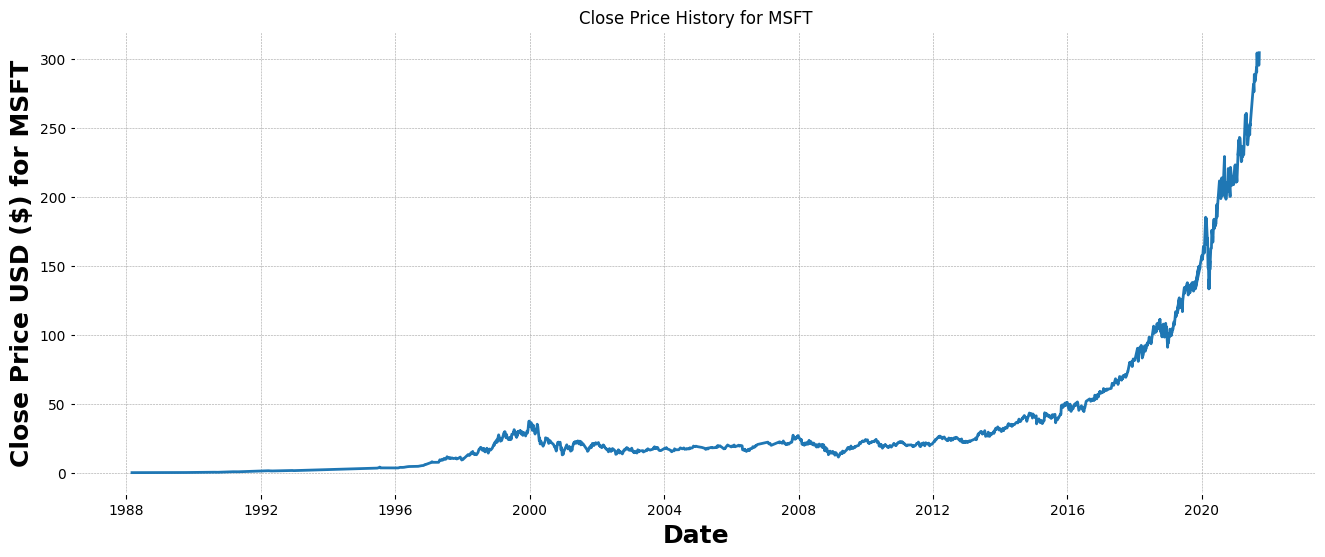

Initial log joint probability = -823.537
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       21980.9     0.0568879       4517.71           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       22479.2     0.0132582       2711.09           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       22794.4    0.00131869       764.151           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       22909.2   0.000501422       3737.79     0.06794           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       23011.1     0.0026756       1137.97           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

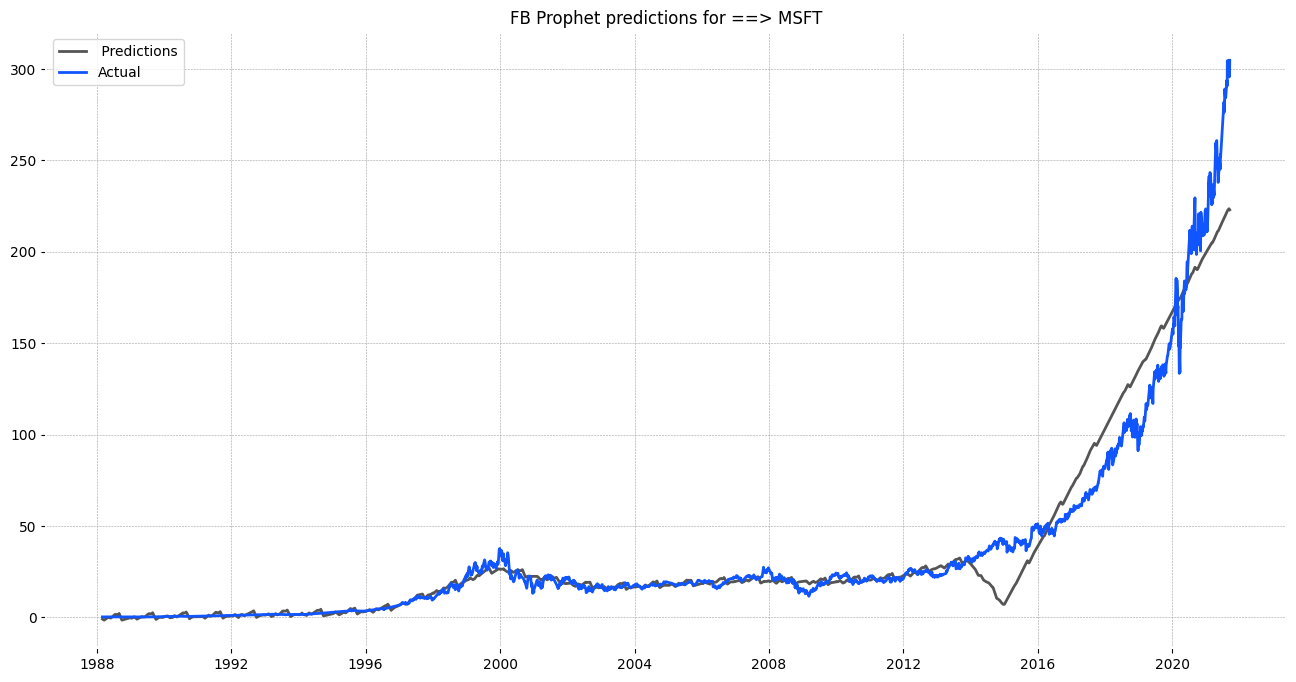

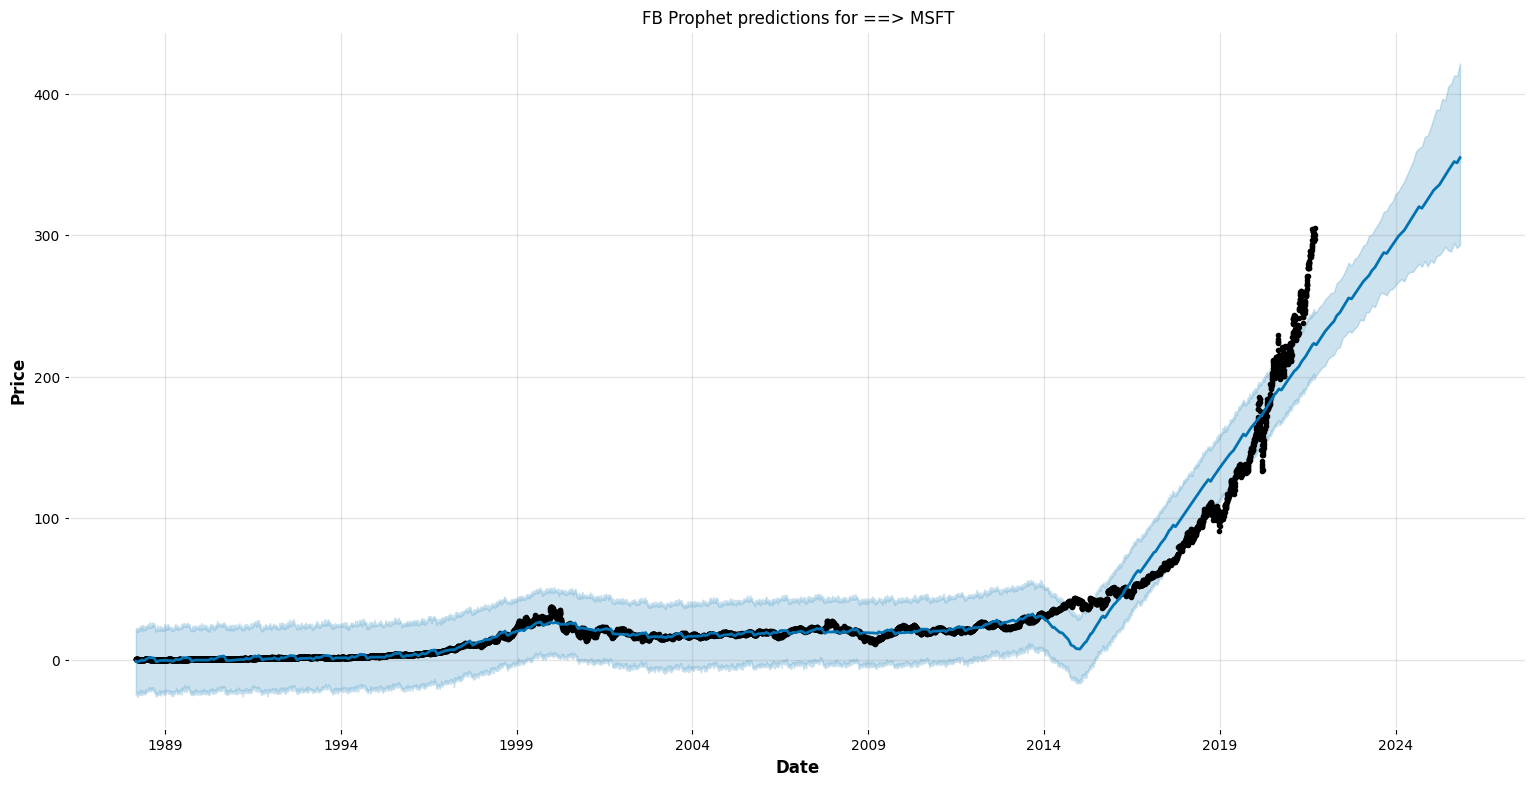

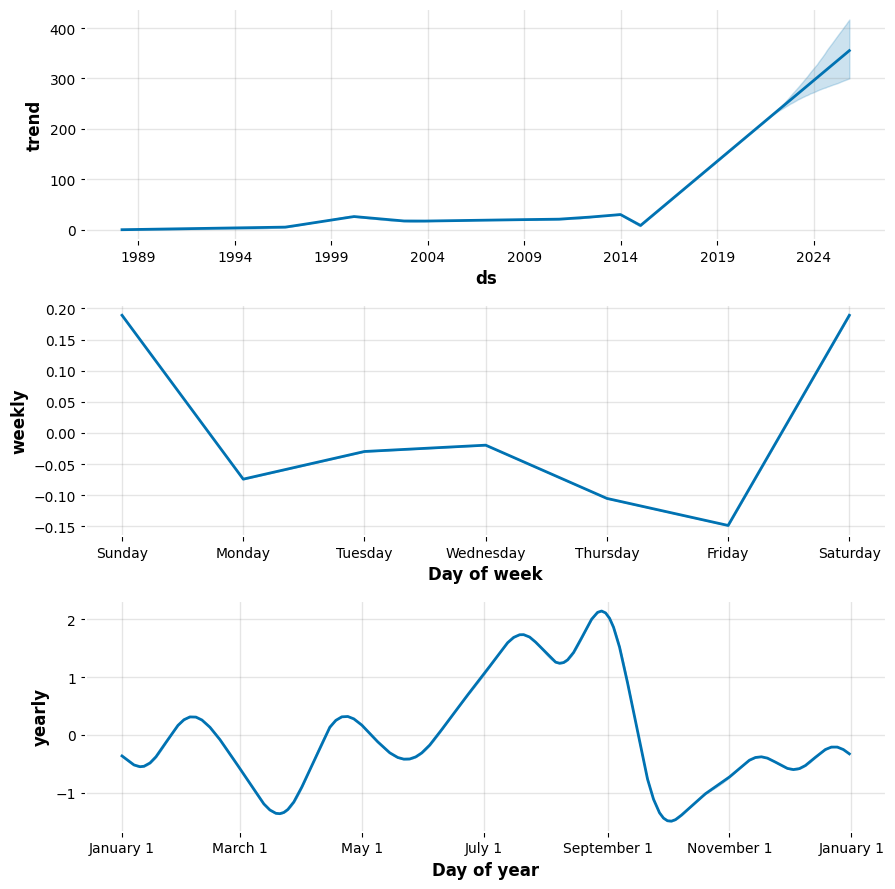

All forecasting done!


In [54]:
plot_close_val(msft, 'Close', 'MSFT') # Plot the Closing Price
fb_prophet_plot(msft, 'Close', 'MSFT')

print("All forecasting done!")

# THIS IS A WORK IN PROGRESS 